<a href="https://colab.research.google.com/github/nsharma73/capstone_haystack/blob/main/Capstone_Project_PCA_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capstone Project - GA Real Estate - PCA Analysis and Clustering**

*By Liliya Lopez*

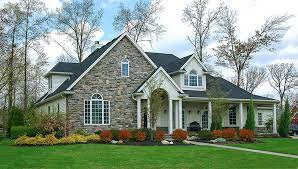

## **1.Introduction**

#####**Libraries used**

In [1]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.4 MB/s 
     |████████████████████████████████| 6.3 MB 38.8 MB/s 
     |████████████████████████████████| 16.7 MB 389 kB/s 


In [47]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt 
import seaborn as sns 
from sklearn import preprocessing
from statsmodels.multivariate.pca import PCA
import geopandas as gpd
from shapely.geometry import Polygon
from shapely.geometry import Point


##### **Import datasets**

In [48]:
from google.colab import drive

In [49]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
completed_data = pd.read_csv('drive/MyDrive/Colab Notebooks/zillow_schools_tax_dataV2.csv', index_col=0)
pd.set_option('display.max_columns', 20)
completed_data.reset_index(inplace=True)
completed_data.head()

,rentZestimate,zestimate,price_y,PCT_CHG,bathrooms,bedrooms,yearBuilt,address,city,state,...,other_crime_total_rate,Prop_Cond_Grp_New,Prop_Cond_Grp_Remodeled,Prop_Cond_Grp_Resale,Two_Car_Garage_0,Two_Car_Garage_1,HasPool_0,HasPool_1,HasHardwood_0,HasHardwood_1
0,2177.90,347870.00,339900,0.117940,2,4,2020.0,101 College Street,Kingsland,Georgia,...,6.365,0,0,1,0,1,1,0,1,0
1,2600.00,325200.00,310000,0.113899,3,5,2004.0,169 School House Creek Drive,Saint Marys,Georgia,...,6.815,0,0,1,1,0,1,0,1,0
2,1999.00,340500.00,315000,0.113899,2,3,2004.0,1621 Sandpiper Court,Saint Marys,Georgia,...,6.815,0,0,1,0,1,1,0,1,0
3,1999.00,312758.00,310000,0.117940,2,3,2018.0,346 Laurel Landing Boulevard,Kingsland,Georgia,...,6.365,0,0,1,1,0,1,0,1,0
4,1980.45,362160.13,369900,0.020674,2,3,2022.0,81 Ossabaw Way,Waverly,Georgia,...,7.125,1,0,0,0,1,1,0,1,0


In [51]:
sum(completed_data.duplicated())

0

In [52]:
completed_data.isnull().sum(axis=0)

rentZestimate                0
zestimate                    0
price_y                      0
PCT_CHG                      0
bathrooms                    0
bedrooms                     0
yearBuilt                    0
address                      0
city                         0
state                        0
zip                          0
latitude                     0
longitude                    0
livingArea                   0
Lot_Size_SqFt                0
Price_SqFt                   0
cap_rate                     0
Tot_Appl                     0
Tot_Comm_Feat                0
Page_Views                   0
Sch_Rat_Avg                  0
Sch_Dist_Avg                 0
sch_cnt                      0
Individuals_taxed            0
Income_per_return            0
Cap_gain                     0
Pension                      0
UE_claims                    0
Social_security              0
SB_income                    0
Student_loan_ded             0
RE_taxes                     0
PP_taxes

In [53]:
completed_data.shape

(4591, 47)

In [54]:
completed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4591 entries, 0 to 4590
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   rentZestimate              4591 non-null   float64
 1   zestimate                  4591 non-null   float64
 2   price_y                    4591 non-null   int64  
 3   PCT_CHG                    4591 non-null   float64
 4   bathrooms                  4591 non-null   int64  
 5   bedrooms                   4591 non-null   int64  
 6   yearBuilt                  4591 non-null   float64
 7   address                    4591 non-null   object 
 8   city                       4591 non-null   object 
 9   state                      4591 non-null   object 
 10  zip                        4591 non-null   int64  
 11  latitude                   4591 non-null   float64
 12  longitude                  4591 non-null   float64
 13  livingArea                 4591 non-null   float

In [55]:
georgia_map = gpd.read_file('drive/MyDrive/Colab Notebooks/Georgia_State_Boundary/Georgia_State_Boundary.shp')

## **2.PCA Analysis**

#####**Selecting numeric features**

In [56]:
num_features = completed_data.select_dtypes(include=['int64','float64'])
num_features.head()

,rentZestimate,zestimate,price_y,PCT_CHG,bathrooms,bedrooms,yearBuilt,zip,latitude,longitude,...,other_crime_total_rate,Prop_Cond_Grp_New,Prop_Cond_Grp_Remodeled,Prop_Cond_Grp_Resale,Two_Car_Garage_0,Two_Car_Garage_1,HasPool_0,HasPool_1,HasHardwood_0,HasHardwood_1
0,2177.90,347870.00,339900,0.117940,2,4,2020.0,31548,30.804209,-81.653325,...,6.365,0,0,1,0,1,1,0,1,0
1,2600.00,325200.00,310000,0.113899,3,5,2004.0,31558,30.767365,-81.588272,...,6.815,0,0,1,1,0,1,0,1,0
2,1999.00,340500.00,315000,0.113899,2,3,2004.0,31558,30.746731,-81.633995,...,6.815,0,0,1,0,1,1,0,1,0
3,1999.00,312758.00,310000,0.117940,2,3,2018.0,31548,30.791878,-81.676750,...,6.365,0,0,1,1,0,1,0,1,0
4,1980.45,362160.13,369900,0.020674,2,3,2022.0,31565,31.104492,-81.604486,...,7.125,1,0,0,0,1,1,0,1,0


In [57]:
num_features.columns

Index(['rentZestimate', 'zestimate', 'price_y', 'PCT_CHG', 'bathrooms',
       'bedrooms', 'yearBuilt', 'zip', 'latitude', 'longitude', 'livingArea',
       'Lot_Size_SqFt', 'Price_SqFt', 'cap_rate', 'Tot_Appl', 'Tot_Comm_Feat',
       'Page_Views', 'Sch_Rat_Avg', 'Sch_Dist_Avg', 'sch_cnt',
       'Individuals_taxed', 'Income_per_return', 'Cap_gain', 'Pension',
       'UE_claims', 'Social_security', 'SB_income', 'Student_loan_ded',
       'RE_taxes', 'PP_taxes', 'Child_credit', 'Earned_Inc_credit',
       'violent_crime_total_rate', 'property_crime_total_rate',
       'other_crime_total_rate', 'Prop_Cond_Grp_New',
       'Prop_Cond_Grp_Remodeled', 'Prop_Cond_Grp_Resale', 'Two_Car_Garage_0',
       'Two_Car_Garage_1', 'HasPool_0', 'HasPool_1', 'HasHardwood_0',
       'HasHardwood_1'],
      dtype='object')

##### **Covariance matrix**

In [58]:
pca = PCA(num_features, standardize=True, method='eig')
normalized_dataset = pca.transformed_data

/usr/local/lib/python3.7/dist-packages/statsmodels/multivariate/pca.py:559: EstimationWarning: Only 41 eigenvalues are positive.  This is the maximum number of components that can be extracted.
  EstimationWarning)


In [59]:
covariance_df = pd.DataFrame(data=np.cov(normalized_dataset, bias=True, rowvar=False), columns=num_features.columns)

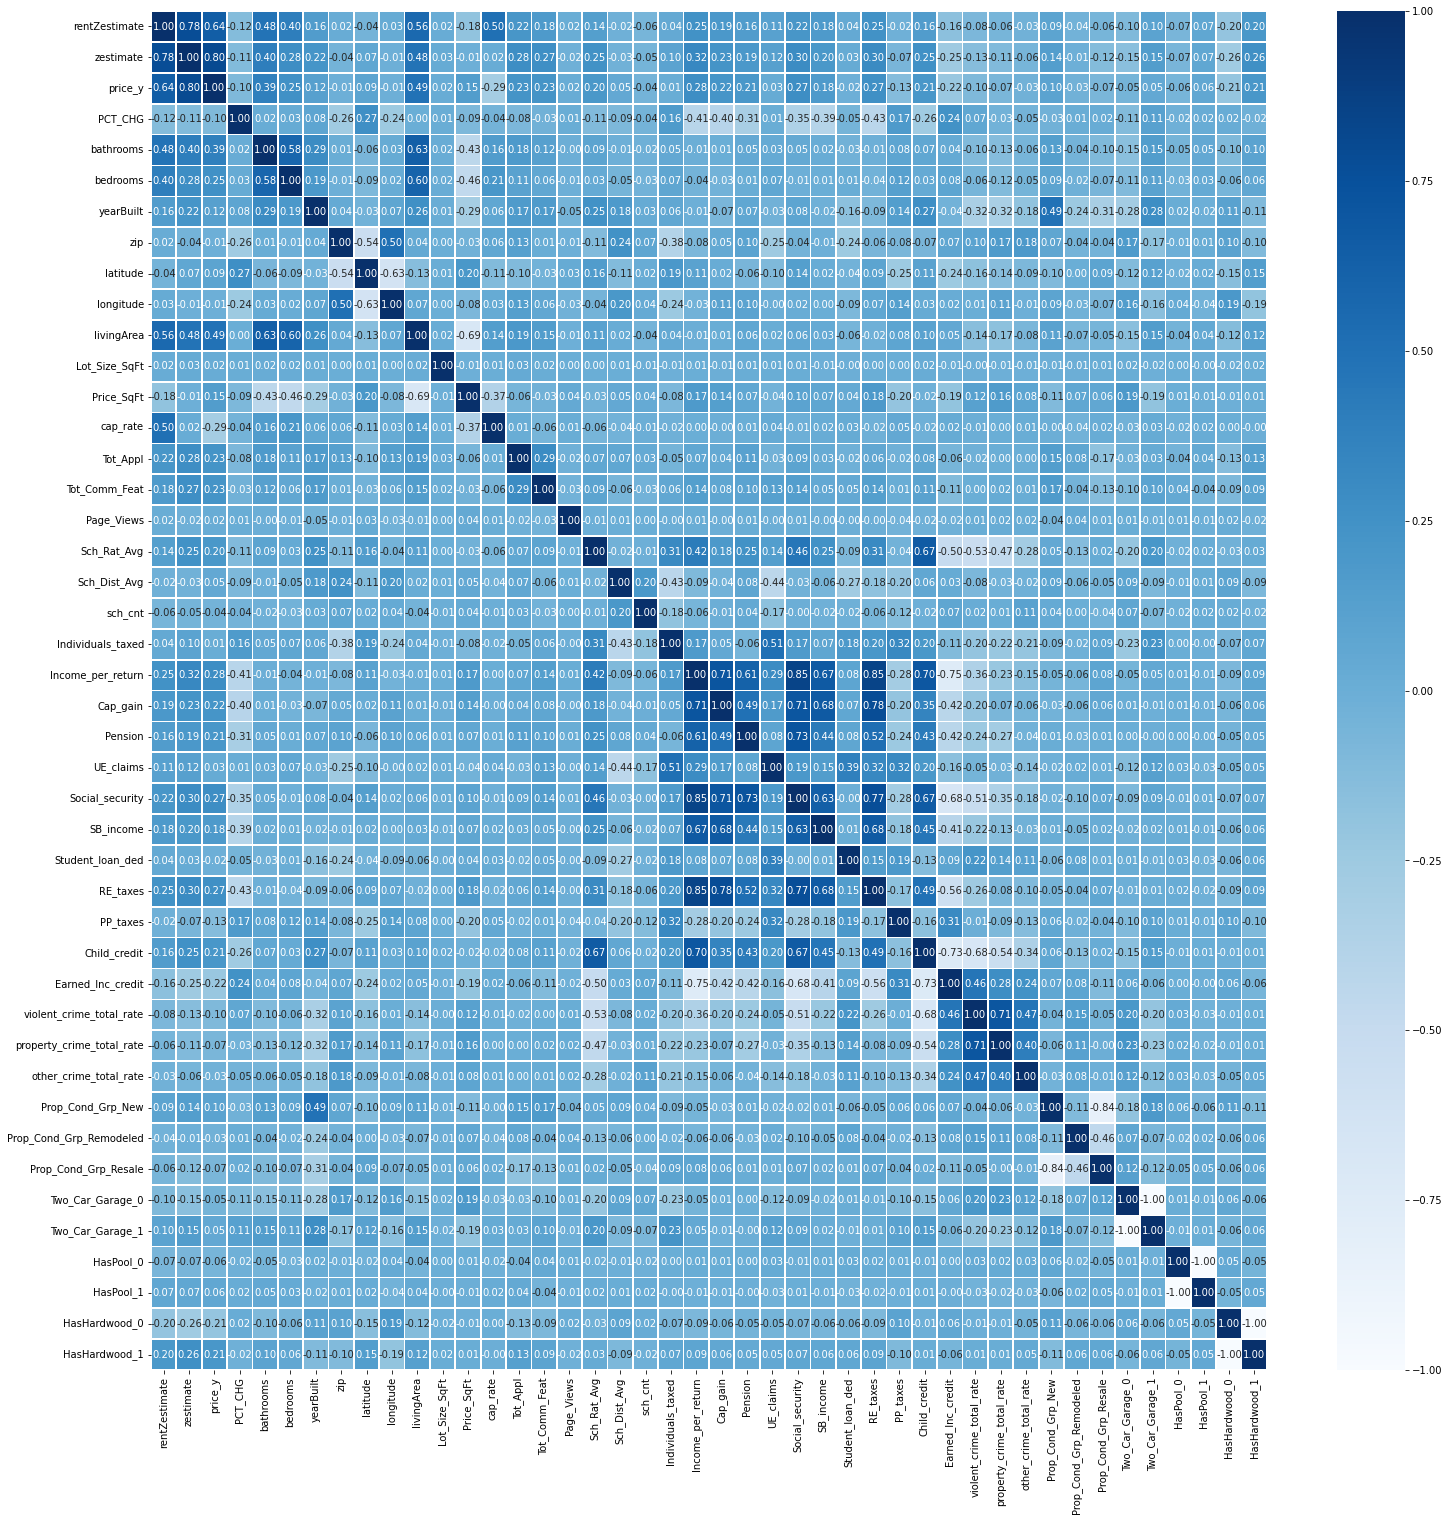

In [60]:
# Plot Covariance Matrix
plt.subplots(figsize=(25, 25))
sns.heatmap(covariance_df, cmap='Blues', linewidths=.7, annot=True, fmt='.2f', yticklabels=num_features.columns)
plt.show()


##### **Run PCA**

In [61]:
# Run PCA with eig method (eigenvectors of the covariance matrix become the components)
pca = PCA(num_features, standardize=True, method='eig')
components_df = pca.factors

/usr/local/lib/python3.7/dist-packages/statsmodels/multivariate/pca.py:559: EstimationWarning: Only 41 eigenvalues are positive.  This is the maximum number of components that can be extracted.
  EstimationWarning)


In [62]:
components_df

,comp_00,comp_01,comp_02,comp_03,comp_04,comp_05,comp_06,comp_07,comp_08,comp_09,...,comp_31,comp_32,comp_33,comp_34,comp_35,comp_36,comp_37,comp_38,comp_39,comp_40
0,0.006440,-0.006594,0.012322,0.028757,0.026712,-0.013491,-0.011090,0.016770,-0.036836,-0.020863,...,0.026896,-0.008740,0.000771,0.007056,-0.017870,-0.012001,0.003636,-0.009539,0.022148,-1.491050e-09
1,0.000986,-0.001362,0.027293,0.024628,0.033587,-0.033578,-0.000934,0.010642,-0.022167,0.003973,...,0.017574,-0.032409,0.009133,0.004137,-0.006158,0.017606,0.005484,-0.039192,0.049399,-1.022145e-09
2,-0.000276,0.002209,0.020609,0.029636,0.027384,-0.006842,-0.015778,0.021139,-0.042663,-0.027312,...,0.017097,-0.029586,0.006182,-0.004276,-0.008298,0.013969,0.007071,-0.039867,0.016692,7.196902e-11
3,0.009843,0.004268,0.016947,0.030954,0.024725,-0.021563,-0.005956,0.000673,-0.039782,-0.003984,...,0.029238,-0.007702,0.000597,0.003188,-0.024203,-0.011814,0.002392,-0.009427,0.025353,-3.969368e-10
4,-0.001383,0.005922,0.045644,0.050317,-0.008220,0.023239,-0.012965,0.032416,-0.017372,-0.016197,...,0.026431,-0.004990,-0.003021,-0.020876,-0.071020,0.010492,0.013198,-0.037257,-0.000115,1.791290e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4586,0.006306,0.019380,0.021603,0.004394,-0.032646,0.005490,0.014675,0.012675,-0.003079,-0.000066,...,0.042401,0.050892,0.005261,-0.024627,-0.044255,-0.032422,0.010262,-0.026465,-0.016408,1.039133e-09
4587,0.011798,0.007796,0.018485,-0.022003,0.004486,-0.023817,0.014952,0.017816,-0.004721,0.014645,...,-0.038456,0.019317,-0.014217,-0.021321,0.027263,0.001386,-0.037346,0.014418,-0.010112,3.696266e-09
4588,0.008485,-0.002702,0.027741,-0.031512,0.006215,-0.008522,0.004929,0.009519,0.012870,0.049245,...,-0.039514,0.012231,-0.004003,0.024082,0.023524,0.003965,0.009705,0.020653,-0.023751,8.828307e-10
4589,0.004157,0.001873,0.028589,-0.012550,-0.014618,-0.030211,0.030787,0.035478,0.028158,0.029439,...,0.027337,0.046980,0.015341,0.025552,-0.034024,-0.030225,-0.023809,-0.029775,0.037034,1.039133e-09


In [63]:
combined_df = pd.concat([num_features, components_df], axis=1)
correlation = combined_df.corr()

In [64]:
correlation_data = correlation[:-len(components_df.columns)].loc[:, 'comp_00':]

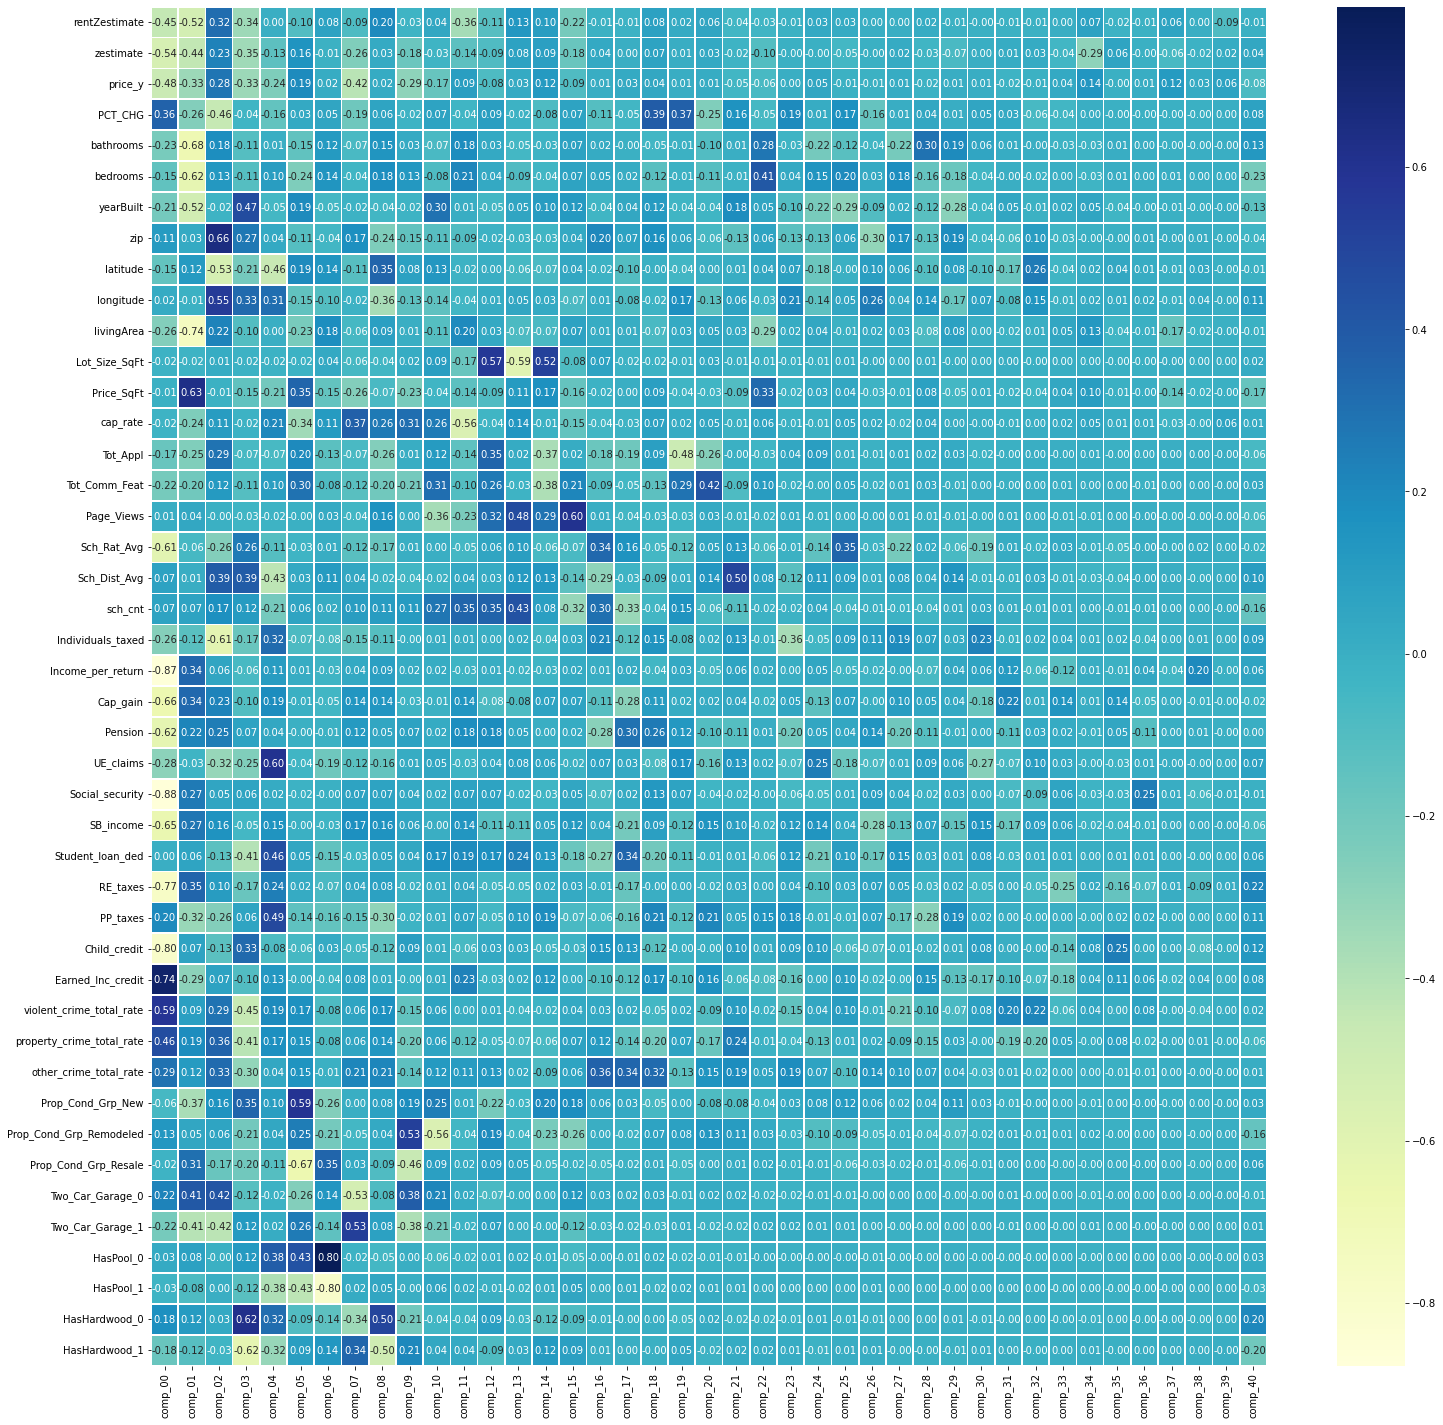

In [65]:
# plot correlation matrix
fig, ax = plt.subplots(figsize=(25, 25))
sns.heatmap(correlation_data, cmap='YlGnBu', linewidths=.7, annot=True, fmt='.2f')
plt.show()

In [66]:
pca = PCA(num_features, standardize=True, method='eig')
loadings = pca.loadings


/usr/local/lib/python3.7/dist-packages/statsmodels/multivariate/pca.py:559: EstimationWarning: Only 41 eigenvalues are positive.  This is the maximum number of components that can be extracted.
  EstimationWarning)


In [67]:
loadings

,comp_00,comp_01,comp_02,comp_03,comp_04,comp_05,comp_06,comp_07,comp_08,comp_09,...,comp_31,comp_32,comp_33,comp_34,comp_35,comp_36,comp_37,comp_38,comp_39,comp_40
rentZestimate,-0.168268,-0.250768,0.172069,-0.195144,0.000210,-0.065511,0.055856,-0.067963,0.159230,-0.024000,...,-0.018327,-0.021721,0.000073,0.183288,-0.042297,-0.027547,0.234049,0.014611,-0.687850,-0.000000e+00
zestimate,-0.203929,-0.213432,0.126744,-0.198936,-0.085982,0.105760,-0.009873,-0.203835,0.021285,-0.151514,...,0.028169,0.052091,-0.105720,-0.728588,0.155483,-0.008682,-0.231531,-0.067120,0.138257,3.927027e-16
price_y,-0.178990,-0.158285,0.153416,-0.190776,-0.156508,0.130430,0.012368,-0.331347,0.017962,-0.248987,...,-0.043988,-0.026571,0.086840,0.360118,-0.013248,0.037735,0.422257,0.099463,0.504722,-1.606676e-16
PCT_CHG,0.135082,-0.123879,-0.248739,-0.022648,-0.101480,0.022837,0.039491,-0.153121,0.048473,-0.020440,...,0.065747,-0.127137,-0.095800,0.002647,-0.009395,-0.007223,-0.014208,-0.016192,0.002603,1.987691e-16
bathrooms,-0.085584,-0.325901,0.097067,-0.063881,0.003240,-0.100877,0.088390,-0.055131,0.120746,0.024790,...,0.025843,-0.000463,-0.060053,-0.063625,0.017317,0.004188,-0.009152,-0.002332,-0.000209,4.292498e-16
bedrooms,-0.055133,-0.300281,0.069730,-0.063389,0.062735,-0.164749,0.104275,-0.030723,0.147651,0.107435,...,-0.001733,-0.032386,0.009898,-0.069631,0.015453,0.003667,0.027335,0.006957,0.002918,-4.503167e-16
yearBuilt,-0.080090,-0.248677,-0.013120,0.267979,-0.032266,0.130372,-0.034639,-0.014407,-0.033510,-0.017841,...,0.093261,-0.017270,0.044649,0.134452,-0.098663,-0.011231,-0.021594,-0.003524,-0.005774,-4.731751e-16
zip,0.041735,0.013598,0.356769,0.156488,0.024055,-0.074744,-0.029361,0.135048,-0.198292,-0.126762,...,-0.128208,0.214622,-0.080889,-0.003967,-0.004219,0.022012,-0.001315,0.026444,-0.007189,1.860280e-17
latitude,-0.057260,0.058592,-0.289264,-0.122560,-0.296862,0.128959,0.105229,-0.089536,0.285732,0.067448,...,-0.342289,0.531032,-0.088384,0.059485,0.110293,0.039979,-0.026853,0.132017,-0.034070,1.031352e-16
longitude,0.007138,-0.004747,0.300480,0.190547,0.200293,-0.100370,-0.076000,-0.016012,-0.295394,-0.113197,...,-0.162336,0.302634,-0.023376,0.055446,0.037253,0.050989,-0.031652,0.140443,-0.005634,5.719712e-17


##### **Dimensionality reduction**

The traditional methods for picking factors include: 
- kaiser criterion
- explained variance
- scree plot 

**Kaiser criterion**

*With this approach we choose the principal components (factors) that have eigenvalues greater than 1.* 

In [68]:
pca = PCA(num_features, standardize=True, method='eig')
eigen_values = pd.DataFrame(data=pca.eigenvals.values, columns=['eigenvalue'])

/usr/local/lib/python3.7/dist-packages/statsmodels/multivariate/pca.py:559: EstimationWarning: Only 41 eigenvalues are positive.  This is the maximum number of components that can be extracted.
  EstimationWarning)


In [69]:
eigen_values

,eigenvalue
0,3.258341e+04
1,1.974659e+04
2,1.560539e+04
3,1.393260e+04
4,1.110146e+04
5,9.980282e+03
6,8.644562e+03
7,7.239119e+03
8,6.931616e+03
9,6.422082e+03


**Explained variance**

*With this method, we choose the total amount of variance in the dataset you want principal amount components to encode (80 or 90%)*

In [70]:
pca = PCA(num_features, standardize=True, method='eig')

# Cumulative Variance Explained
cumulative_variance_explained = pd.DataFrame(data=pca.rsquare.values, columns=['cumulative_var'])

/usr/local/lib/python3.7/dist-packages/statsmodels/multivariate/pca.py:559: EstimationWarning: Only 41 eigenvalues are positive.  This is the maximum number of components that can be extracted.
  EstimationWarning)


In [71]:
cumulative_variance_explained

,cumulative_var
0,0.000000
1,0.161301
2,0.259054
3,0.336307
4,0.405279
5,0.460236
6,0.509642
7,0.552436
8,0.588273
9,0.622587


- the first 18 components explain about 80% of variance 

- the first 24 component explain about 90% of variance in the dataset

/usr/local/lib/python3.7/dist-packages/statsmodels/multivariate/pca.py:559: EstimationWarning: Only 41 eigenvalues are positive.  This is the maximum number of components that can be extracted.
  EstimationWarning)


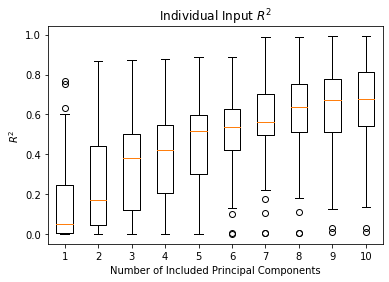

In [72]:
pca = PCA(num_features, standardize=True, method='eig')
pca.plot_rsquare()
plt.show()

**Scree plot**

*With this method we use the elbow method to determine the cut-off point*

/usr/local/lib/python3.7/dist-packages/statsmodels/multivariate/pca.py:559: EstimationWarning: Only 41 eigenvalues are positive.  This is the maximum number of components that can be extracted.
  EstimationWarning)


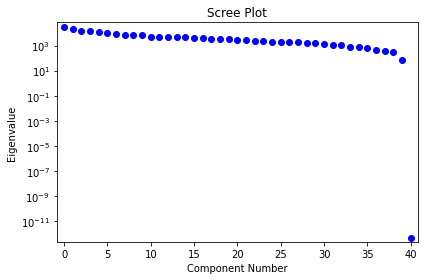

In [73]:
pca = PCA(num_features, standardize=True, method='eig')
pca.plot_scree()
plt.show()
#number of components #5? 

## **3.Combining PCA and K-means Clustering**

In [74]:
completed_data.columns

Index(['rentZestimate', 'zestimate', 'price_y', 'PCT_CHG', 'bathrooms',
       'bedrooms', 'yearBuilt', 'address', 'city', 'state', 'zip', 'latitude',
       'longitude', 'livingArea', 'Lot_Size_SqFt', 'Price_SqFt', 'cap_rate',
       'Tot_Appl', 'Tot_Comm_Feat', 'Page_Views', 'Sch_Rat_Avg',
       'Sch_Dist_Avg', 'sch_cnt', 'Individuals_taxed', 'Income_per_return',
       'Cap_gain', 'Pension', 'UE_claims', 'Social_security', 'SB_income',
       'Student_loan_ded', 'RE_taxes', 'PP_taxes', 'Child_credit',
       'Earned_Inc_credit', 'violent_crime_total_rate',
       'property_crime_total_rate', 'other_crime_total_rate',
       'Prop_Cond_Grp_New', 'Prop_Cond_Grp_Remodeled', 'Prop_Cond_Grp_Resale',
       'Two_Car_Garage_0', 'Two_Car_Garage_1', 'HasPool_0', 'HasPool_1',
       'HasHardwood_0', 'HasHardwood_1'],
      dtype='object')

Text(0.5, 1.0, 'Visualization of Latitude vs Longitude')

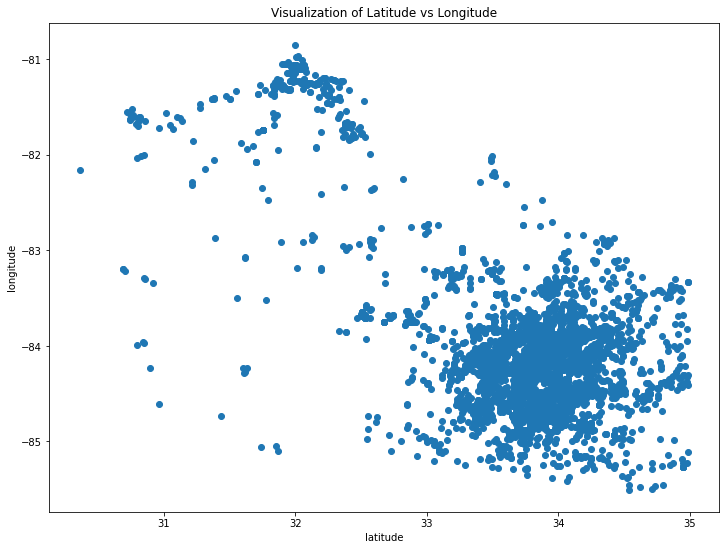

In [75]:
plt.figure(figsize = (12, 9))
plt.scatter(completed_data.latitude, completed_data.longitude)
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.title("Visualization of Latitude vs Longitude")

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [77]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(num_features)

In [78]:
pca = PCA()
pca.fit(segmentation_std)

PCA()

In [79]:
first_ten_ratios = pca.explained_variance_ratio_[0:10]
first_ten_ratios

array([0.16130082, 0.09775345, 0.07725286, 0.06897192, 0.05495664,
       0.04940636, 0.04279401, 0.03583651, 0.03431425, 0.03179185])

Text(0, 0.5, 'Cumulative Explained Variance')

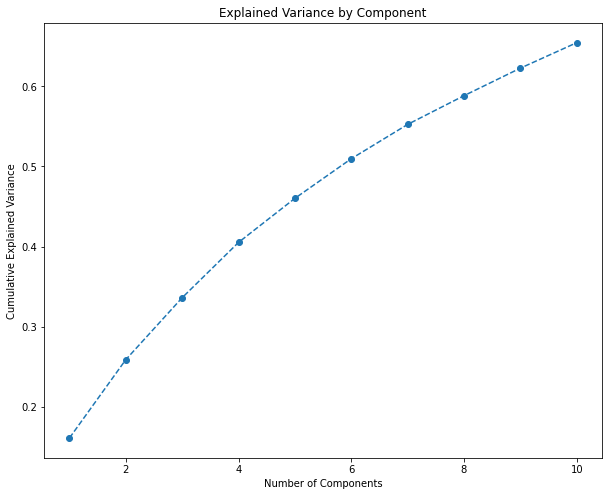

In [80]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), first_ten_ratios.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Component')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')


In [81]:
pca = PCA(n_components=4)

In [82]:
pca.fit(segmentation_std)

PCA(n_components=4)

In [83]:
pca.transform(segmentation_std)

array([[-1.16254654, -0.92666505,  1.53927402, -3.39426276],
       [-0.17801241, -0.19138713,  3.40951721, -2.90695603],
       [ 0.04982069,  0.31044176,  2.57451526, -3.49797071],
       ...,
       [-1.53160816, -0.37974284,  3.46537903,  3.71966793],
       [-0.75042458,  0.26320803,  3.57136354,  1.48135184],
       [-3.54790441,  0.74246521,  3.08243692, -4.12645985]])

In [84]:
scores_pca = pca.transform(segmentation_std)

In [85]:
from sklearn.cluster import KMeans

In [86]:
sum_of_squares = [] #find summ of squares within cluster
for i in range(1, 21):
  kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans_pca.fit(scores_pca)
  sum_of_squares.append(kmeans_pca.inertia_)

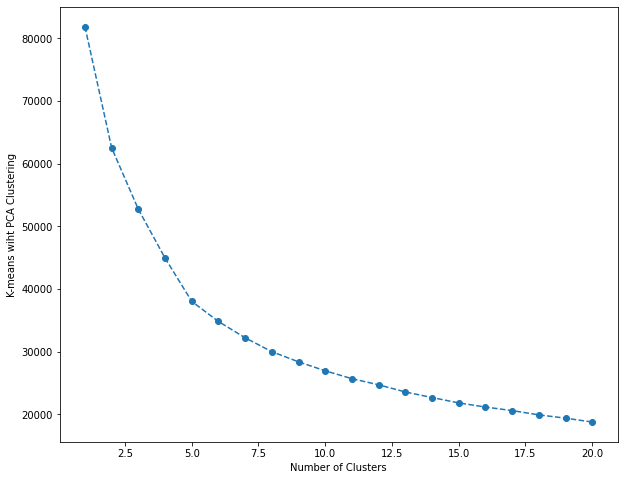

In [87]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, 21), sum_of_squares, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('K-means wiht PCA Clustering')
plt.show()

In [102]:
kmeans_pca = KMeans(n_clusters = 5, init = 'k-means++', random_state=42)

In [103]:
 kmeans_pca.fit(scores_pca)

KMeans(n_clusters=5, random_state=42)

In [104]:
kmeans_pca.labels_

array([4, 4, 4, ..., 3, 4, 4], dtype=int32)

In [106]:
df_segm_pca_kmeans = pd.concat([num_features.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-4:] = ['comp1', 'comp2', 'comp3', 'comp4']
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [107]:
df_segm_pca_kmeans.head()

,rentZestimate,zestimate,price_y,PCT_CHG,bathrooms,bedrooms,yearBuilt,zip,latitude,longitude,...,Two_Car_Garage_1,HasPool_0,HasPool_1,HasHardwood_0,HasHardwood_1,comp1,comp2,comp3,comp4,Segment K-means PCA
0,2177.90,347870.00,339900,0.117940,2,4,2020.0,31548,30.804209,-81.653325,...,1,1,0,1,0,-1.162547,-0.926665,1.539274,-3.394263,4
1,2600.00,325200.00,310000,0.113899,3,5,2004.0,31558,30.767365,-81.588272,...,0,1,0,1,0,-0.178012,-0.191387,3.409517,-2.906956,4
2,1999.00,340500.00,315000,0.113899,2,3,2004.0,31558,30.746731,-81.633995,...,1,1,0,1,0,0.049821,0.310442,2.574515,-3.497971,4
3,1999.00,312758.00,310000,0.117940,2,3,2018.0,31548,30.791878,-81.676750,...,0,1,0,1,0,-1.776807,0.599756,2.117058,-3.653608,4
4,1980.45,362160.13,369900,0.020674,2,3,2022.0,31565,31.104492,-81.604486,...,1,1,0,1,0,0.249677,0.832156,5.701895,-5.939251,4


In [108]:
df_segm_pca_kmeans['Segment'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0: 'first', 1: 'second', 2: 'third', 3: 'fourth', 4: 'fifth'})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


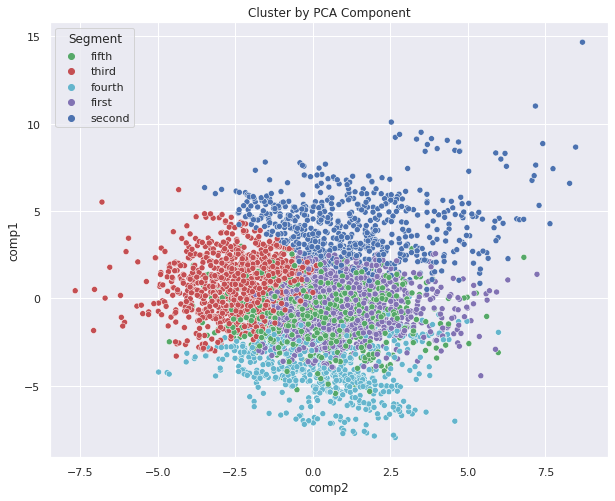

In [111]:
x_axis = df_segm_pca_kmeans['comp2']
y_axis = df_segm_pca_kmeans['comp1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Segment'], palette = ['g', 'r', 'c', 'm', 'b'])
plt.title('Cluster by PCA Component')
plt.show()

[Text(0.5, 1.0, 'Segmentation K-means')]

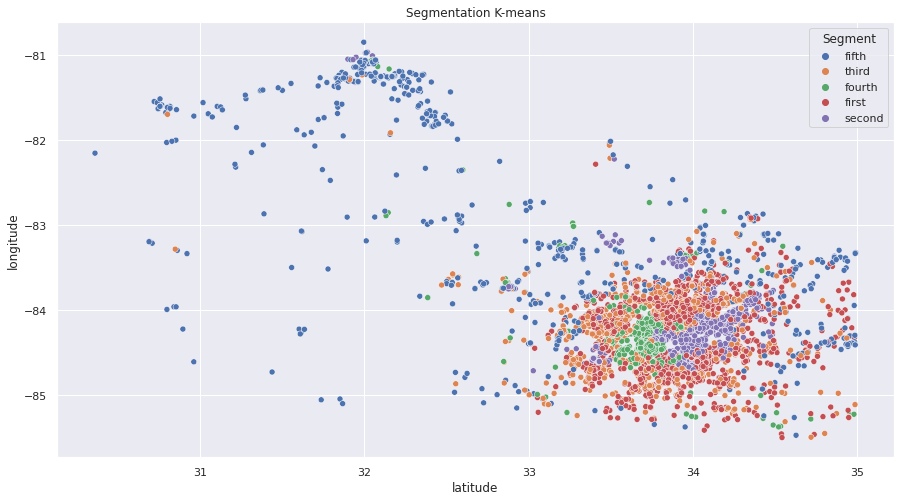

In [112]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(data = df_segm_pca_kmeans, x = 'latitude',  y = 'longitude', hue = 'Segment').set(title = "Segmentation K-means")

## **4. Plot clusters on the map**

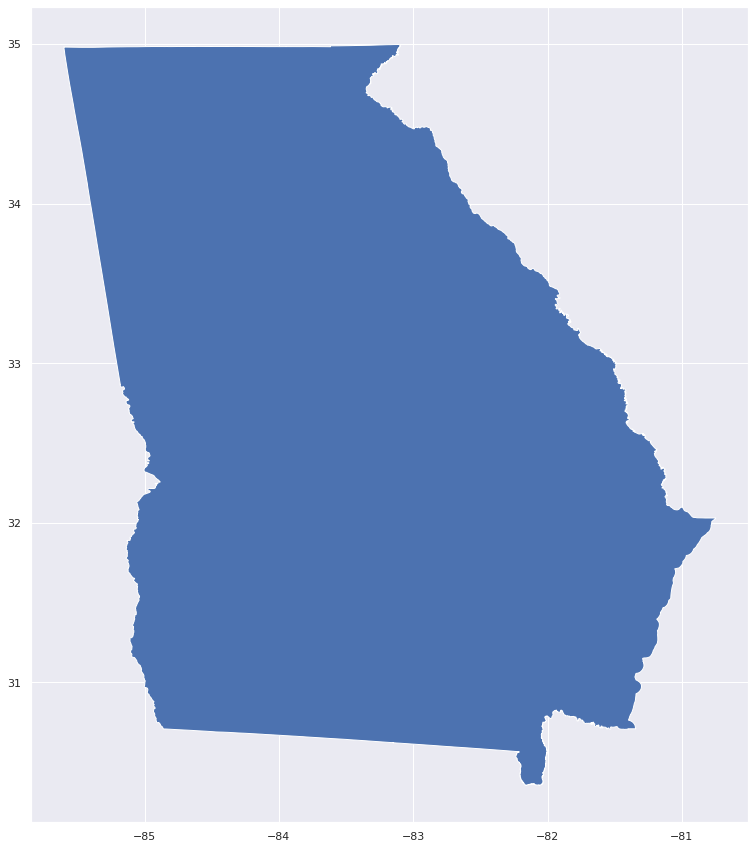

In [113]:
fig,ax = plt.subplots(figsize =(15,15))
georgia_map.plot(ax = ax)

In [114]:
df_map = df_segm_pca_kmeans
crs = {'init':'epsg:4326'}
df_map.head()

,rentZestimate,zestimate,price_y,PCT_CHG,bathrooms,bedrooms,yearBuilt,zip,latitude,longitude,...,HasPool_0,HasPool_1,HasHardwood_0,HasHardwood_1,comp1,comp2,comp3,comp4,Segment K-means PCA,Segment
0,2177.90,347870.00,339900,0.117940,2,4,2020.0,31548,30.804209,-81.653325,...,1,0,1,0,-1.162547,-0.926665,1.539274,-3.394263,4,fifth
1,2600.00,325200.00,310000,0.113899,3,5,2004.0,31558,30.767365,-81.588272,...,1,0,1,0,-0.178012,-0.191387,3.409517,-2.906956,4,fifth
2,1999.00,340500.00,315000,0.113899,2,3,2004.0,31558,30.746731,-81.633995,...,1,0,1,0,0.049821,0.310442,2.574515,-3.497971,4,fifth
3,1999.00,312758.00,310000,0.117940,2,3,2018.0,31548,30.791878,-81.676750,...,1,0,1,0,-1.776807,0.599756,2.117058,-3.653608,4,fifth
4,1980.45,362160.13,369900,0.020674,2,3,2022.0,31565,31.104492,-81.604486,...,1,0,1,0,0.249677,0.832156,5.701895,-5.939251,4,fifth


In [115]:
geometry = [Point(xy) for xy in zip (df_map['longitude'], df_map['latitude'])]
geometry[:3]

In [116]:
geo_df = gpd.GeoDataFrame(df_map, crs = crs, geometry = geometry)
geo_df.head()

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,rentZestimate,zestimate,price_y,PCT_CHG,bathrooms,bedrooms,yearBuilt,zip,latitude,longitude,...,HasPool_1,HasHardwood_0,HasHardwood_1,comp1,comp2,comp3,comp4,Segment K-means PCA,Segment,geometry
0,2177.90,347870.00,339900,0.117940,2,4,2020.0,31548,30.804209,-81.653325,...,0,1,0,-1.162547,-0.926665,1.539274,-3.394263,4,fifth,POINT (-81.65332 30.80421)
1,2600.00,325200.00,310000,0.113899,3,5,2004.0,31558,30.767365,-81.588272,...,0,1,0,-0.178012,-0.191387,3.409517,-2.906956,4,fifth,POINT (-81.58827 30.76737)
2,1999.00,340500.00,315000,0.113899,2,3,2004.0,31558,30.746731,-81.633995,...,0,1,0,0.049821,0.310442,2.574515,-3.497971,4,fifth,POINT (-81.63399 30.74673)
3,1999.00,312758.00,310000,0.117940,2,3,2018.0,31548,30.791878,-81.676750,...,0,1,0,-1.776807,0.599756,2.117058,-3.653608,4,fifth,POINT (-81.67675 30.79188)
4,1980.45,362160.13,369900,0.020674,2,3,2022.0,31565,31.104492,-81.604486,...,0,1,0,0.249677,0.832156,5.701895,-5.939251,4,fifth,POINT (-81.60449 31.10449)


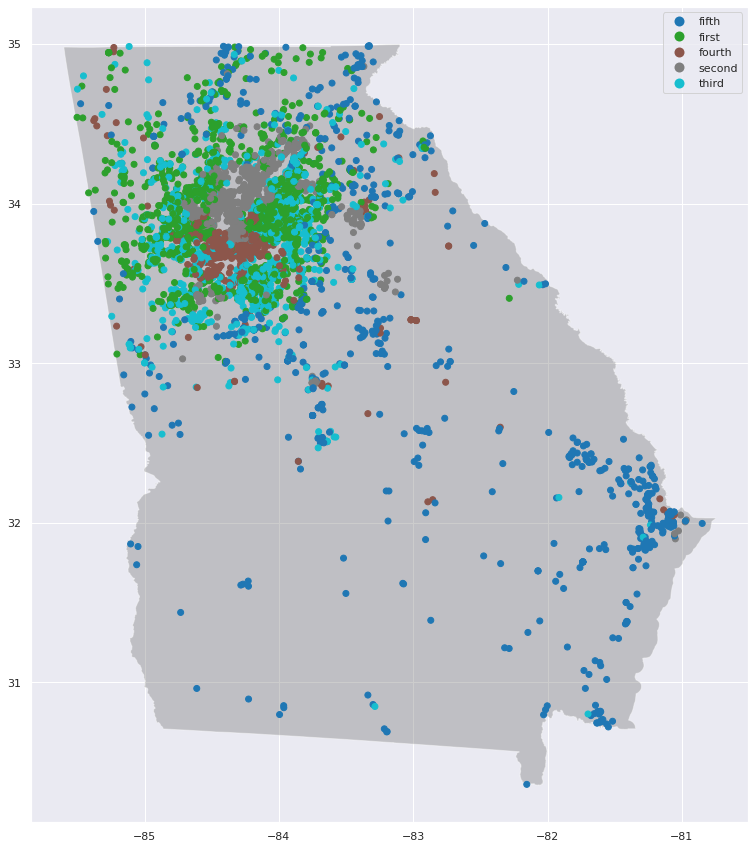

In [118]:
fig,ax = plt.subplots(figsize =(15,15))
georgia_map.plot(ax=ax, alpha = 0.4, color = 'grey')
geo_df.plot(column = 'Segment', ax=ax, legend = True, label = "Segmentation")


In [119]:
geo_df.Segment.value_counts()

first     1404
third     1122
fifth      782
second     651
fourth     632
Name: Segment, dtype: int64

## **5. Clusters Analysis**

In [120]:
df_segm_pca_kmeans.columns

Index(['rentZestimate', 'zestimate', 'price_y', 'PCT_CHG', 'bathrooms',
       'bedrooms', 'yearBuilt', 'zip', 'latitude', 'longitude', 'livingArea',
       'Lot_Size_SqFt', 'Price_SqFt', 'cap_rate', 'Tot_Appl', 'Tot_Comm_Feat',
       'Page_Views', 'Sch_Rat_Avg', 'Sch_Dist_Avg', 'sch_cnt',
       'Individuals_taxed', 'Income_per_return', 'Cap_gain', 'Pension',
       'UE_claims', 'Social_security', 'SB_income', 'Student_loan_ded',
       'RE_taxes', 'PP_taxes', 'Child_credit', 'Earned_Inc_credit',
       'violent_crime_total_rate', 'property_crime_total_rate',
       'other_crime_total_rate', 'Prop_Cond_Grp_New',
       'Prop_Cond_Grp_Remodeled', 'Prop_Cond_Grp_Resale', 'Two_Car_Garage_0',
       'Two_Car_Garage_1', 'HasPool_0', 'HasPool_1', 'HasHardwood_0',
       'HasHardwood_1', 'comp1', 'comp2', 'comp3', 'comp4',
       'Segment K-means PCA', 'Segment', 'geometry'],
      dtype='object')

In [121]:
df1 = df_segm_pca_kmeans[df_segm_pca_kmeans.Segment == 'first']
df2 = df_segm_pca_kmeans[df_segm_pca_kmeans.Segment == 'second']
df3 = df_segm_pca_kmeans[df_segm_pca_kmeans.Segment == 'third']
df4 = df_segm_pca_kmeans[df_segm_pca_kmeans.Segment == 'fourth']
df5 = df_segm_pca_kmeans[df_segm_pca_kmeans.Segment == 'fifth']

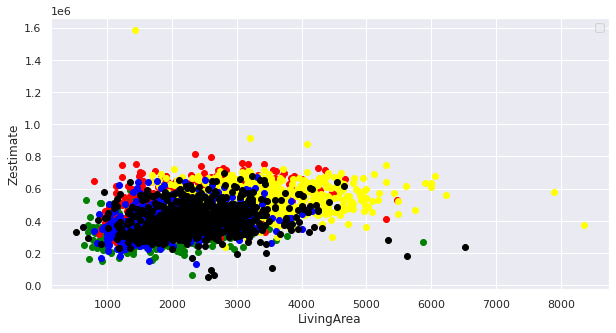

In [122]:
plt.figure(figsize = (10,5))

plt.scatter(df1['livingArea'], df1['zestimate'], color = 'green')
plt.scatter(df2['livingArea'], df2['zestimate'], color = 'red')
plt.scatter(df3['livingArea'], df3['zestimate'], color = 'yellow')
plt.scatter(df4['livingArea'], df4['zestimate'], color='blue')
plt.scatter(df5['livingArea'], df5['zestimate'], color='black')


plt.xlabel('LivingArea')
plt.ylabel('Zestimate')
plt.legend()

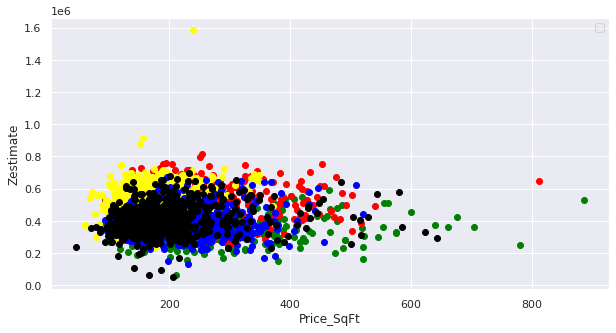

In [123]:
plt.figure(figsize = (10,5))

plt.scatter(df1['Price_SqFt'], df1['zestimate'], color = 'green')
plt.scatter(df2['Price_SqFt'], df2['zestimate'], color = 'red')
plt.scatter(df3['Price_SqFt'], df3['zestimate'], color = 'yellow')
plt.scatter(df4['Price_SqFt'], df4['zestimate'], color='blue')
plt.scatter(df5['Price_SqFt'], df5['zestimate'], color='black')


plt.xlabel('Price_SqFt')
plt.ylabel('Zestimate')
plt.legend()

In [124]:
completed_data.describe()

,rentZestimate,zestimate,price_y,PCT_CHG,bathrooms,bedrooms,yearBuilt,zip,latitude,longitude,...,other_crime_total_rate,Prop_Cond_Grp_New,Prop_Cond_Grp_Remodeled,Prop_Cond_Grp_Resale,Two_Car_Garage_0,Two_Car_Garage_1,HasPool_0,HasPool_1,HasHardwood_0,HasHardwood_1
count,4591.000000,4.591000e+03,4591.000000,4591.000000,4591.000000,4591.000000,4591.000000,4591.000000,4591.000000,4591.000000,...,4591.000000,4591.000000,4591.000000,4591.000000,4591.000000,4591.000000,4591.000000,4591.000000,4591.000000,4591.000000
mean,2490.589466,4.290687e+05,438127.563494,0.144729,2.945763,3.801133,1992.539220,30363.465694,33.706610,-84.040594,...,9.006819,0.165323,0.055761,0.778915,0.576127,0.423873,0.979961,0.020039,0.512525,0.487475
std,605.454472,1.058145e+05,94015.582284,0.033895,0.877148,0.936483,26.328306,509.686647,0.650778,0.826645,...,7.034874,0.371513,0.229485,0.415023,0.494224,0.494224,0.140150,0.140150,0.499898,0.499898
min,145.000000,5.100000e+04,300000.000000,0.008691,1.000000,1.000000,1817.000000,30002.000000,30.361079,-85.502994,...,2.299000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2089.000000,3.503025e+05,359900.000000,0.128885,2.000000,3.000000,1978.000000,30083.000000,33.539404,-84.516594,...,4.913000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,2394.000000,4.133285e+05,424900.000000,0.147230,3.000000,4.000000,1998.000000,30224.000000,33.827917,-84.208855,...,7.062000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,2837.450000,4.968500e+05,499999.000000,0.162760,3.000000,4.000000,2015.000000,30523.000000,34.047747,-83.873284,...,10.680000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,10386.000000,1.587200e+06,650000.000000,0.286409,13.000000,12.000000,2023.000000,39854.000000,34.990492,-80.848741,...,111.100000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [131]:
clus_1_median = df1.select_dtypes(include=['int64','float64']).median()

In [132]:
clus_2_median = df2.select_dtypes(include=['int64','float64']).median()

In [133]:
clus_3_median = df3.select_dtypes(include=['int64','float64']).median()

In [134]:
clus_4_median = df4.select_dtypes(include=['int64','float64']).median()

In [135]:
clus_5_median = df5.select_dtypes(include=['int64','float64']).median()

In [152]:
join = [clus_1_median, clus_2_median, clus_3_median, clus_4_median, clus_5_median]
cluster_medians = pd.concat(join, axis = 1)
cluster_medians = cluster_medians.rename(columns= {0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3', 3: 'Cluster 4', 4: 'Cluster 5'})

In [153]:
cluster_medians 

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5
rentZestimate,2120.000000,2745.000000,2884.900000,2149.000000,2349.000000
zestimate,362450.000000,512900.000000,499051.000000,358900.000000,388000.000000
price_y,375000.000000,500000.000000,498700.000000,374250.000000,410950.000000
PCT_CHG,0.154711,0.122164,0.154711,0.147660,0.122731
bathrooms,3.000000,3.000000,4.000000,3.000000,3.000000
bedrooms,3.000000,4.000000,4.000000,3.000000,4.000000
yearBuilt,1994.000000,1991.000000,2006.000000,1964.000000,2008.000000
zip,30141.000000,30114.000000,30180.000000,30310.000000,31008.000000
latitude,33.916355,33.985901,33.822154,33.727819,33.040444
longitude,-84.243267,-84.305611,-84.174165,-84.399784,-83.327585
